# Análisis exploratorio de los datos (EDA) de Yelp

El Análisis Exploratorio de Datos (EDA) es una etapa fundamental en cualquier proyecto de análisis de datos. Este proceso permite comprender la estructura, la calidad y las características generales de los datos para identificar patrones, valores atípicos, posibles problemas y oportunidades de mejora. En este documento, se presentará un EDA detallado basado en los siguientes aspectos clave:

1. **Tipos de Datos**: Se examina el formato de las variables (numéricas, categóricas, fechas, etc.) para garantizar la correcta interpretación y tratamiento de cada una.

2. **Valores Faltantes y Nulos**: Se analiza la presencia de valores ausentes y su impacto en el análisis, identificando la proporción de datos faltantes por variable y proponiendo estrategias de manejo.

3. **Registros Duplicados**: Se detectan y eliminan registros redundantes que podrían distorsionar los resultados del análisis.

4. **Metadatos y Diccionario de Datos**: Se revisa la documentación del conjunto de datos para confirmar la coherencia entre las variables y su descripción.

5. **Valores Atípicos (Outliers)**: Se identifican puntos que se desvían significativamente del resto de los datos, utilizando técnicas gráficas como diagramas de caja y análisis estadístico.

6. **Distribución de las Variables**: Se visualiza la distribución de las variables numéricas y categóricas mediante histogramas, diagramas de barras y gráficos de densidad, permitiendo interpretar tendencias y concentraciones de datos.

A lo largo del análisis, se emplearán gráficos y resúmenes estadísticos que proporcionen una representación clara y efectiva de los hallazgos. Estos incluyen histogramas para entender la distribución, diagramas de caja para visualizar valores atípicos, gráficos de barras para variables categóricas y matrices de calor para ilustrar la relación entre valores faltantes o duplicados.

Al final de este EDA, se contará con una comprensión integral del conjunto de datos, estableciendo las bases para las etapas posteriores del análisis o modelado predictivo.

## Se importan las librerías a utilizar

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import re
import glob
import os
import pyarrow as pa
import pyarrow.parquet as pq
import json
from collections import Counter
import nltk
from nltk.corpus import stopwords
import warnings

warnings.filterwarnings("ignore")

## Se realiza la carga de los archivos de Yelp

### Carga del dataset ``business.pkl``
El archivo `business.pkl` contiene un conjunto de datos sobre negocios y sus características clave, lo cual puede ser útil para análisis de negocios locales, identificación de tendencias o desarrollo de modelos predictivos. La información incluye:

#### Descripción General
- **ID del negocio:** Identificador único de 22 caracteres para cada negocio.
- **Nombre:** Nombre comercial del establecimiento.
- **Dirección:** Ubicación física completa (dirección, ciudad, estado y código postal).
- **Coordenadas:** Latitud y longitud geográfica.

#### Detalles del Negocio
- **Calificación:** Promedio de estrellas basadas en reseñas (redondeado a 0 o 0.5).
- **Número de reseñas:** Cantidad de opiniones de clientes.
- **Estado:** Indica si el negocio está abierto (1) o cerrado (0).

#### Atributos
- **Atributos específicos:** Información como si ofrece comida para llevar, disponibilidad de estacionamiento (con detalles como garaje, calle, valet, etc.).
- **Categorías:** Clasificación del negocio, como "Mexican", "Burgers" o "Gastropubs".

#### Horarios
- **Horario de operación:** Horas de apertura y cierre especificadas por día, utilizando formato de 24 horas.

Este archivo es ideal para realizar análisis espaciales, estudiar calificaciones de clientes, identificar negocios según categorías, o incluso desarrollar aplicaciones para consumidores que deseen explorar negocios locales.

In [2]:
df_business = pd.read_pickle('../Datasets/Yelp/business.pkl')

#### Se procede a realizar una inspección inicial del archivo

In [3]:
print(df_business.columns)
print("-"*50)
print(df_business.dtypes)
print("-"*50)
df_business.head(3)

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'business_id', 'name', 'address',
       'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')
--------------------------------------------------
business_id     object
name            object
address         object
city            object
state           object
postal_code     object
latitude        object
longitude       object
stars           object
review_count    object
is_open         object
attributes      object
categories      object
hours           object
business_id     object
name            object
address         object
city            object
state           object
postal_code     object
latitude        object
longitude       object
stars           object
review_count    object
is_open    

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Identificación y tratamiento de valores nulos y duplicados

Imprimimos las columnas para verificar si existen duplicadas:

 [False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True] 

____________________________________________________________________________________________________ 
Mostramos las columnas luego de eliminar duplicadas:

 Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object') 

____________________________________________________________________________________________________ 
Datos antes de eliminar nulos 
 (150346, 14)
____________________________________________________________________________________________________


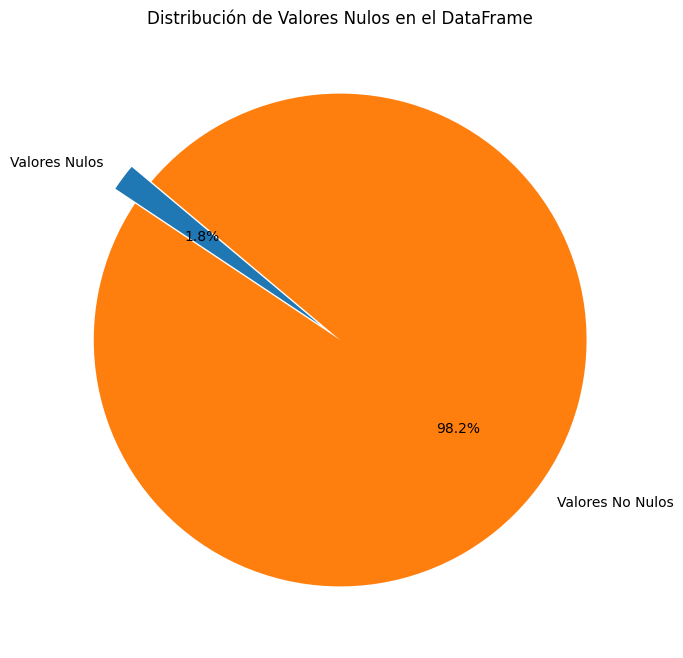

Datos después de eliminar duplicados 
 (117616, 14)


In [4]:
# Eliminamos columnas duplicadas
print("Imprimimos las columnas para verificar si existen duplicadas:\n\n",df_business.columns.duplicated(), "\n")
df_business = df_business.loc[:, ~df_business.columns.duplicated()]

# Mostramos las columnas después de eliminar duplicados
print("_"*100,"\nMostramos las columnas luego de eliminar duplicadas:\n\n",df_business.columns, "\n")
print("_"*100,"\nDatos antes de eliminar nulos \n",df_business.shape)
print("_"*100)

# Contamos valores nulos y no nulos en el DataFrame
null_counts = df_business.isnull().sum().sum()
non_null_counts = df_business.size - null_counts

# Prepararamos datos para el diagrama circular
labels = ['Valores Nulos', 'Valores No Nulos']
sizes = [null_counts, non_null_counts]
explode = (0.1, 0)  # Resaltar la sección de valores nulos

# Creamos el diagrama circular
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Valores Nulos en el DataFrame')
plt.show()

# Eliminamos filas con los valores nulos
df_business = df_business.dropna()
print("Datos después de eliminar duplicados \n",df_business.shape)

#### Se procede a seleccionar los negocios que sean restaurantes

In [5]:
# Paso 1: Filtramos los negocios que sean restaurantes
# Verificamos si en la columna 'categories' aparece la palabra "Restaurant"
df_restaurants = df_business[df_business['categories'].str.contains('Restaurant', case=False, na=False)]

# Mostramos la cantidad de restaurantes encontrados
print(f"Se encontraron {len(df_restaurants)} negocios que son restaurantes.")

# Mostramos una vista previa del nuevo DataFrame
df_restaurants.head()

Se encontraron 44692 negocios que son restaurantes.


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,AZ,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,MO,37207,36.208102,-86.76817,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,MO,33602,27.955269,-82.45632,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."
12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,TN,46227,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."


#### Estudiamos si hay posibles outliers que puedan afectar a nuestro análisis

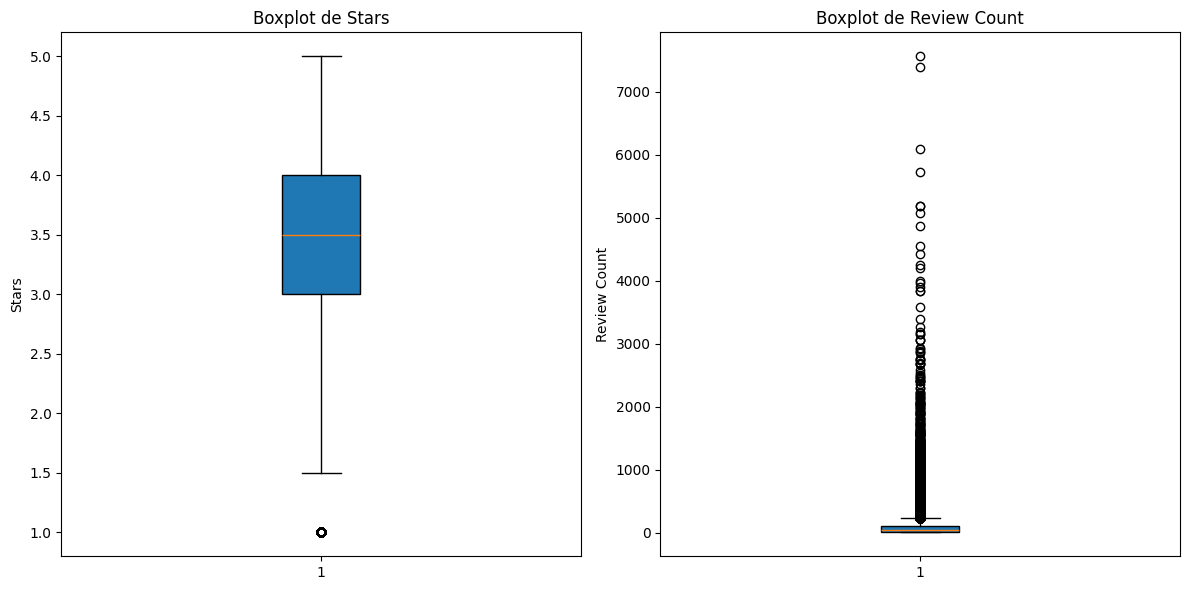

In [6]:
# Crear boxplots para las columnas 'stars' y 'review_count'
plt.figure(figsize=(12, 6))

# Boxplot para 'stars'
plt.subplot(1, 2, 1)
plt.boxplot(df_restaurants['stars'], vert=True, patch_artist=True)
plt.title('Boxplot de Stars')
plt.ylabel('Stars')

# Boxplot para 'review_count'
plt.subplot(1, 2, 2)
plt.boxplot(df_restaurants['review_count'], vert=True, patch_artist=True)
plt.title('Boxplot de Review Count')
plt.ylabel('Review Count')

plt.tight_layout()
plt.show()


In [7]:
# Ordenamos el DataFrame por 'review_count' de mayor a menor
df_sorted = df_restaurants.sort_values(by="review_count", ascending=False)
df_sorted.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
113731,_ab50qdWOk0DdB6XOrBitw,Acme Oyster House,724 Iberville St,New Orleans,AZ,70130,29.954273,-90.068965,4.0,7568,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ''fu...","Live/Raw Food, Seafood, Restaurants, Cajun/Creole","{'Monday': '11:0-22:0', 'Thursday': '11:0-22:0..."
112552,ac1AeYqs8Z4_e2X5M3if2A,Oceana Grill,739 Conti St,New Orleans,FL,70130,29.956231,-90.067563,4.0,7400,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Restaurants, Seafood, Cajun/Creole, Breakfast ...","{'Monday': '8:0-1:0', 'Tuesday': '8:0-1:0', 'W..."
91757,GXFMD0Z4jEVZBCsbPf4CTQ,Hattie B’s Hot Chicken - Nashville,112 19th Ave S,Nashville,NJ,37203,36.151387,-86.796603,4.5,6093,1,"{'RestaurantsGoodForGroups': 'True', 'Business...","American (Traditional), Chicken Shop, Southern...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-16:0', ..."


#### Creamos un DF que nos ayude a comprender mejor la distribución de los datos

In [8]:
state_summary = df_restaurants.groupby('state').agg(
        total_review_count=('review_count', 'sum'),  # Total de reseñas
        total_business=('business_id', 'count')     # Total de negocios
    ).reset_index()  # Reiniciamos el índice para conservar 'state' como columna

# Añadimos la columna 'review_density'
state_summary['review_density'] = (state_summary['total_review_count'] / state_summary['total_business'])

# Ordenamos el DataFrame por las métricas de total_review_count y review_density
state_summary = state_summary.sort_values(by=['total_review_count', 'review_density'], ascending=[False, False]).reset_index(drop=True)

In [9]:
# Mostramos los datos
state_summary

,state,total_review_count,total_business,review_density
0,PA,996772,9930,100.379859
1,FL,768466,7880,97.521066
2,TN,343837,3613,95.166621
3,MO,315202,3215,98.041058
4,LA,301121,3002,100.306795
5,AZ,299270,2973,100.66263
6,IN,292885,3340,87.69012
7,NJ,258435,2517,102.675805
8,NV,239992,2292,104.708551
9,AB,165249,1629,101.441989


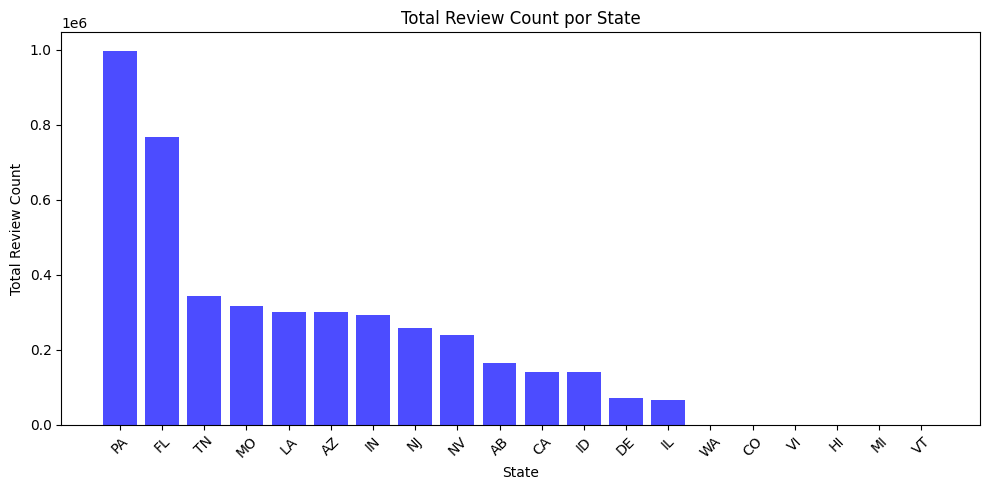

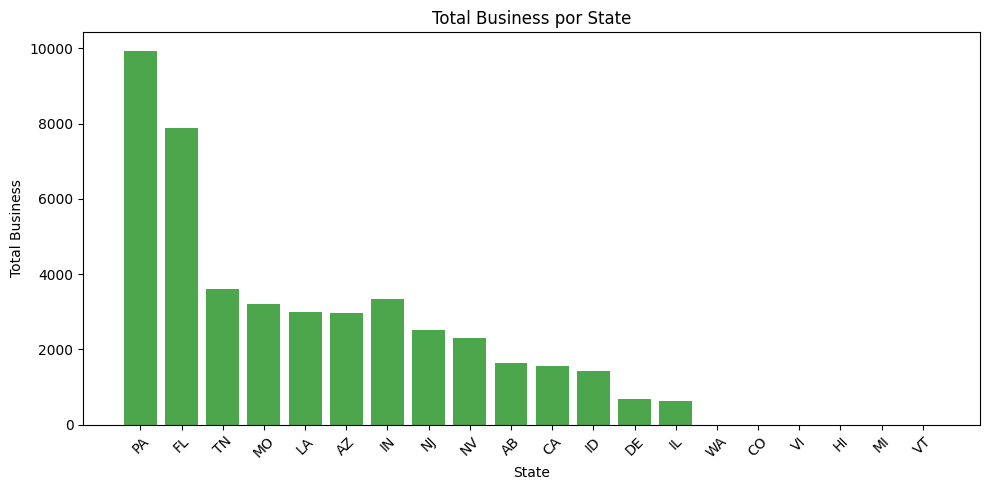

In [10]:
# Gráfico para 'total_review_count' por estado
plt.figure(figsize=(10, 5))
plt.bar(state_summary['state'], state_summary['total_review_count'], color='blue', alpha=0.7)
plt.title('Total Review Count por State')
plt.xlabel('State')
plt.ylabel('Total Review Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico para 'total_business' por estado
plt.figure(figsize=(10, 5))
plt.bar(state_summary['state'], state_summary['total_business'], color='green', alpha=0.7)
plt.title('Total Business por State')
plt.xlabel('State')
plt.ylabel('Total Business')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Se toma la decisión de estudiar los 14 primeros estados debido a la cantidad de reviews y la densidad de reviews, lo cual puede aportar a nuestro análisis

In [11]:
# Generamos una lista con los primeros 14 estados del DataFrame ordenado
top_14_states = state_summary['state'].head(14).tolist()

# Mostramos la lista generada
print(top_14_states)


['PA', 'FL', 'TN', 'MO', 'LA', 'AZ', 'IN', 'NJ', 'NV', 'AB', 'CA', 'ID', 'DE', 'IL']


#### Finalmente generamos un Dataset llamado `filtered_restaurants.parquet` con la información filtrada por estados

In [12]:
# Filtramos el DataFrame 'df_restaurants' utilizando la lista 'top_14_states'
filtered_restaurants = df_restaurants[df_restaurants['state'].isin(top_14_states)]

# Generamos el archivo Parquet con el DataFrame filtrado
output_file = "../Data_cleaned/Yelp/filtered_restaurants.parquet"
filtered_restaurants.to_parquet(output_file, index=False)

# Confirmamos la creación del archivo
print(f"Archivo Parquet generado: {output_file}")

Archivo Parquet generado: ../Data_cleaned/Yelp/filtered_restaurants.parquet


### Carga del dataset ``checkin.json``
El archivo `checkin.json` contiene datos sobre los registros (check-ins) realizados en los negocios, proporcionando información sobre la frecuencia y los patrones de visitas de los usuarios. Este archivo es útil para analizar el comportamiento del cliente y las tendencias de visitas a los negocios.

#### Descripción General
- **ID del negocio:** Identificador único de 22 caracteres que se relaciona con el archivo `business.pkl`.
- **Fechas de registro:** Una lista de fechas y horas en las que se realizaron check-ins en el negocio, separadas por comas.

#### Detalles del Contenido
- **Formato de fecha y hora:** Las fechas están en el formato `YYYY-MM-DD HH:MM:SS`, lo que permite realizar análisis temporales precisos.

#### Usos Potenciales
Este archivo es ideal para:
1. **Análisis temporal:**
   - Identificar días y horas pico para visitas a negocios.
   - Evaluar patrones de estacionalidad en la actividad de los clientes.
2. **Tendencias de comportamiento:**
   - Analizar la frecuencia de visitas en un negocio específico.
3. **Optimización operativa:**
   - Ayudar a negocios a planificar recursos y personal en función de los picos de check-ins.
4. **Visualizaciones:** 
   - Crear gráficos de series temporales para ilustrar tendencias en los check-ins.

#### Consideraciones
Aunque no incluye información personal de los usuarios, puede complementarse con otros archivos (`business.pkl`, `review.json`) para un análisis más completo del comportamiento del cliente y el rendimiento del negocio.

In [13]:
df_checkin = pd.read_json('../Datasets/Yelp/checkin.json', lines= True)
print(df_checkin.columns)
print("_"*100)
print(df_checkin.dtypes)
df_checkin.head(3)

Index(['business_id', 'date'], dtype='object')
____________________________________________________________________________________________________
business_id    object
date           object
dtype: object


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"


#### Generamos un archivo parquet

In [14]:
# Generamos el archivo Parquet con el DataFrame filtrado
output_file = "../Data_cleaned/Yelp/filtered_checkin.parquet"
df_checkin.to_parquet(output_file, index=False)

# Confirmamos la creación del archivo
print(f"Archivo Parquet generado: {output_file}")

Archivo Parquet generado: ../Data_cleaned/Yelp/filtered_checkin.parquet


#### Realizamos un gráfico para entender la distribución de los datos

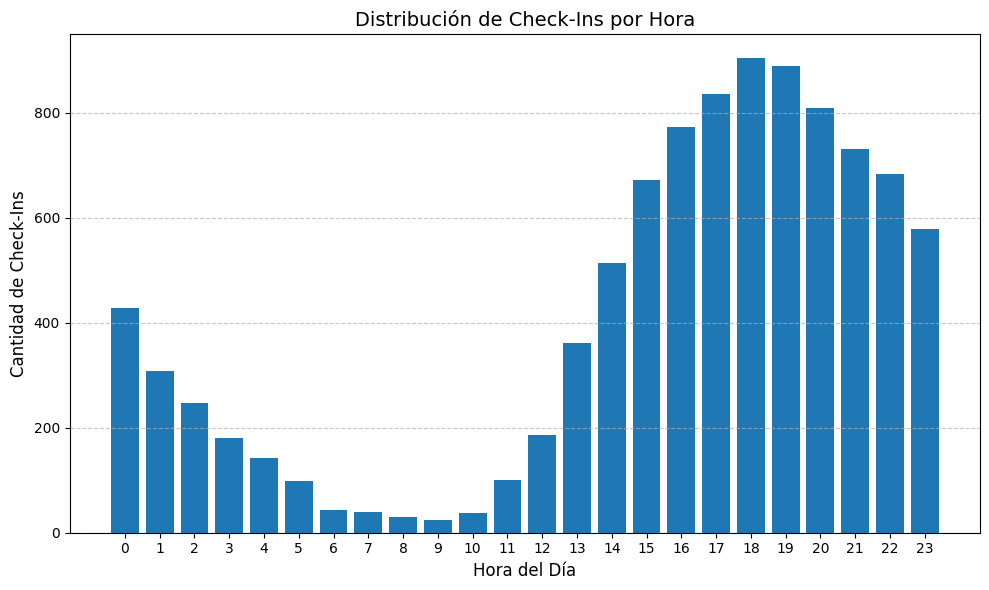

In [15]:

# Cargamos el archivo proporcionado
file_path = '../Data_cleaned/Yelp/filtered_checkin.parquet'
df_checkin = pd.read_parquet(file_path)

# Analizamos la columna que contiene las fechas de los check-ins
if 'date' in df_checkin.columns:
    # Paso 1: Extraemos las horas de los timestamps
    df_checkin['hour'] = pd.to_datetime(df_checkin['date'], errors='coerce').dt.hour

    # Paso 2: Contamos los check-ins por cada hora
    hourly_reviews = df_checkin['hour'].value_counts().sort_index()

    # Paso 3: Generamos un gráfico de barras para representar los check-ins por hora
    plt.figure(figsize=(10, 6))
    plt.bar(hourly_reviews.index, hourly_reviews.values, width=0.8)
    plt.title('Distribución de Check-Ins por Hora', fontsize=14)
    plt.xlabel('Hora del Día', fontsize=12)
    plt.ylabel('Cantidad de Check-Ins', fontsize=12)
    plt.xticks(range(0, 24))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró la columna 'date' en el DataFrame.")


### Carga del archivo ``review.json``
El archivo `review.json` contiene un conjunto de datos detallado sobre las reseñas realizadas por los usuarios para diversos negocios. Este archivo es clave para análisis de comportamiento del cliente, evaluación de desempeño comercial y creación de sistemas de recomendación.

#### Descripción General
- **ID de reseña:** Identificador único de 22 caracteres para cada reseña.
- **ID de usuario:** Identificador único del usuario que escribió la reseña (relacionado con `user.parquet`).
- **ID del negocio:** Identificador único del negocio reseñado (relacionado con `business.pkl`).

#### Detalles de la Reseña
- **Puntaje en estrellas:** Calificación otorgada al negocio en una escala de 1 a 5.
- **Fecha:** Fecha en que se escribió la reseña (formato YYYY-MM-DD).
- **Texto:** Contenido completo de la reseña, usualmente en inglés.

#### Interacciones con la Reseña
- **Votos útiles:** Número de usuarios que marcaron la reseña como útil.
- **Votos graciosos:** Número de usuarios que consideraron la reseña graciosa.
- **Votos cool:** Número de usuarios que encontraron la reseña interesante o "cool".

#### Usos Potenciales
Este archivo es útil para:
- Analizar el feedback de clientes para comprender sus preferencias.
- Evaluar la calidad del servicio de negocios basándose en calificaciones y comentarios.
- Desarrollar modelos de análisis de sentimientos utilizando el texto de las reseñas.
- Examinar tendencias temporales de reseñas para identificar patrones en calificaciones.

Es un recurso clave para proyectos de minería de texto, análisis de datos del cliente y desarrollo de sistemas de recomendaciones personalizadas.

In [16]:
# Carga review.json
# Intentamos con utf-8
try:
    with open('../Datasets/Yelp/review.json', 'r', encoding='utf-8') as f:
        df_review = pd.DataFrame([json.loads(line) for line in f])
except UnicodeDecodeError:
    # Si utf-8 falla, intentamos con utf-8-sig
    with open('../Datasets/Yelp/review.json', 'r', encoding='utf-8-sig') as f:
        df_review = pd.DataFrame([json.loads(line) for line in f])

In [17]:
df_review

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5.0,1,2,1,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20
6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5.0,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10
6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,1,0,0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30
6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27


#### Realizamos el tratamiento de datos nulos y duplicados

In [18]:
# Paso 1: Eliminamos las filas duplicadas
df_review = df_review.drop_duplicates()

# Paso 2: Eliminamos las filas con valores nulos
df_review = df_review.dropna()

# Confirmamos los cambios
print(f"Dimensiones del DataFrame después de limpiar duplicados y nulos: {df_review.shape}")
print(f"Número de duplicados restantes: {df_review.duplicated().sum()}")
print(f"Valores nulos restantes:\n{df_review.isnull().sum()}")


Dimensiones del DataFrame después de limpiar duplicados y nulos: (6990280, 9)
Número de duplicados restantes: 0
Valores nulos restantes:
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64


#### Realizamos un análisis del comportamiento de las reseñas para determinar un patrón de subida de reviews

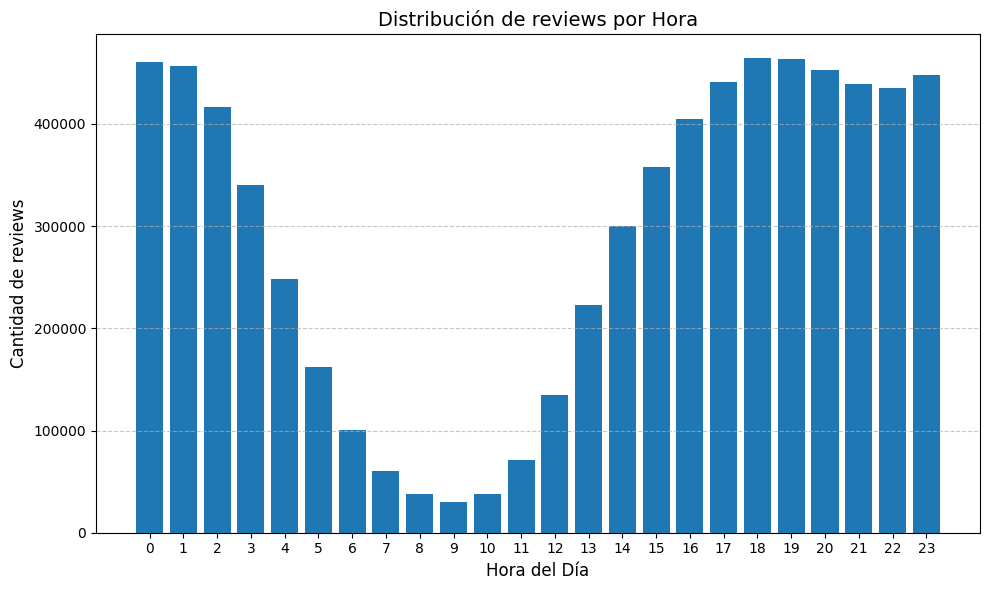

In [19]:
if 'date' in df_review.columns:
    # Paso 1: Extraemos las horas de los timestamps
    df_review['hour'] = pd.to_datetime(df_review['date'], errors='coerce').dt.hour

    # Paso 2: Contamos los check-ins por cada hora
    hourly_reviews = df_review['hour'].value_counts().sort_index()

    # Paso 3: Generamos un gráfico de barras para representar los check-ins por hora
    plt.figure(figsize=(10, 6))
    plt.bar(hourly_reviews.index, hourly_reviews.values, width=0.8)
    plt.title('Distribución de reviews por Hora', fontsize=14)
    plt.xlabel('Hora del Día', fontsize=12)
    plt.ylabel('Cantidad de reviews', fontsize=12)
    plt.xticks(range(0, 24))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró la columna 'date' en el DataFrame.")

#### Visualizamos si existen outliers en el dataset

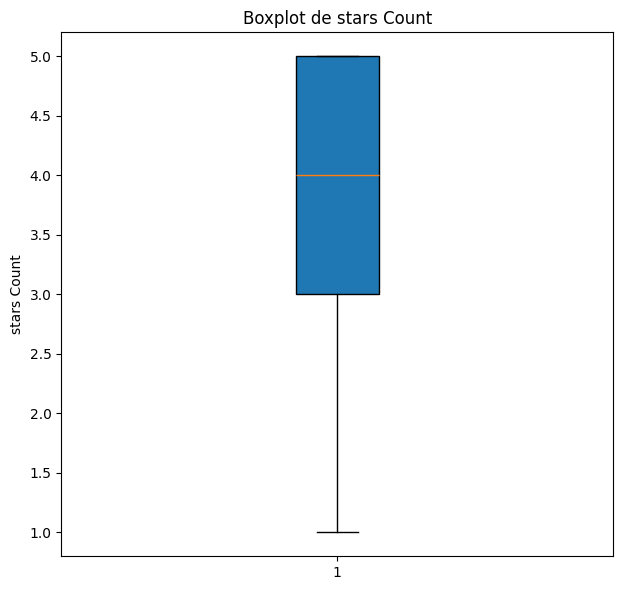

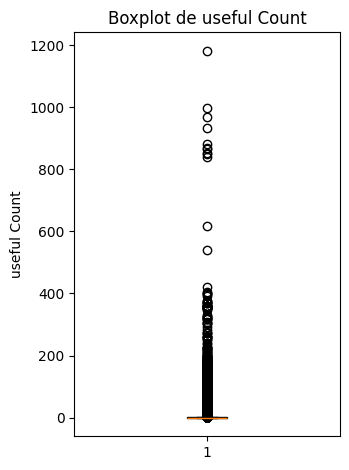

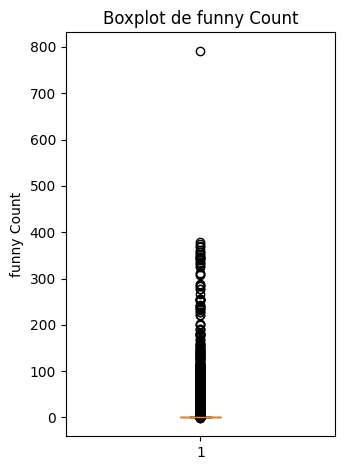

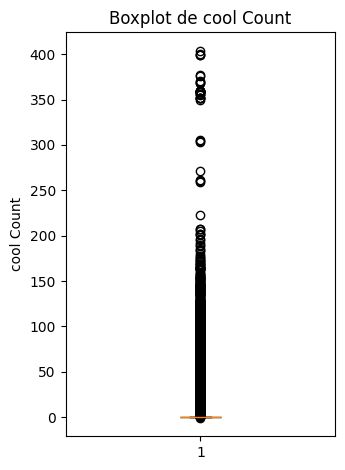

In [20]:
# Crear boxplots para las columnas 'stars' y 'review_count'
plt.figure(figsize=(12, 6))

for i in ['stars','useful', 'funny', 'cool']:

    plt.subplot(1, 2, 2)
    plt.boxplot(df_review[i], vert=True, patch_artist=True)
    plt.title(f'Boxplot de {i} Count')
    plt.ylabel(f'{i} Count')
    plt.tight_layout()
    plt.show()

#### Para realizar un análisis profundo e ir preparando una data para un futuro uso en modelos de ML se decide realizar un merge junto con el DF filtrado de restaurantes siendo posible gracias a que ambos DF poseen la columna en común denominada `business_id`

In [21]:
# Realizamos un join entre los DataFrames 'filtered_restaurants' y 'df_review' usando 'business_id' como columna común
# Usamos un join tipo 'inner' para obtener solo las filas donde haya coincidencia en ambos DataFrames
merged_df = pd.merge(filtered_restaurants, df_review, on='business_id', how='inner')

# Confirmamos las dimensiones del DataFrame resultante
print(f"Dimensiones del DataFrame combinado: {merged_df.shape}")


Dimensiones del DataFrame combinado: (4557513, 23)


In [22]:
merged_df.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,hours,review_id,user_id,stars_y,useful,funny,cool,text,date,hour
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,"{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",BXQcBN0iAi1lAUxibGLFzA,6_SpY41LIHZuIaiDs5FMKA,4.0,0,0,1,This is nice little Chinese bakery in the hear...,2014-05-26 01:09:53,1
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,"{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",uduvUCvi9w3T2bSGivCfXg,tCXElwhzekJEH6QJe3xs7Q,4.0,3,1,2,This is the bakery I usually go to in Chinatow...,2013-10-05 15:19:06,15
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,"{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",a0vwPOqDXXZuJkbBW2356g,WqfKtI-aGMmvbA9pPUxNQQ,5.0,0,0,0,"A delightful find in Chinatown! Very clean, an...",2013-10-25 01:34:57,1


In [23]:
merged_df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars_x', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'review_id', 'user_id', 'stars_y',
       'useful', 'funny', 'cool', 'text', 'date', 'hour'],
      dtype='object')

In [24]:
# Mostramos todos los datos de la primera fila
first_row = merged_df.iloc[0]
first_row

business_id                                MTSW4McQd7CbVtyjqoe9mw
name                                           St Honore Pastries
address                                               935 Race St
city                                                 Philadelphia
state                                                          CA
postal_code                                                 19107
latitude                                                39.955505
longitude                                              -75.155564
stars_x                                                       4.0
review_count                                                   80
is_open                                                         1
attributes      {'RestaurantsDelivery': 'False', 'OutdoorSeati...
categories      Restaurants, Food, Bubble Tea, Coffee & Tea, B...
hours           {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...
review_id                                  BXQcBN0iAi1lAUxibGLFzA
user_id   

#### Podemos realizar un análisis de las variables mediante un heatmap para considerar si existe relación entre estas

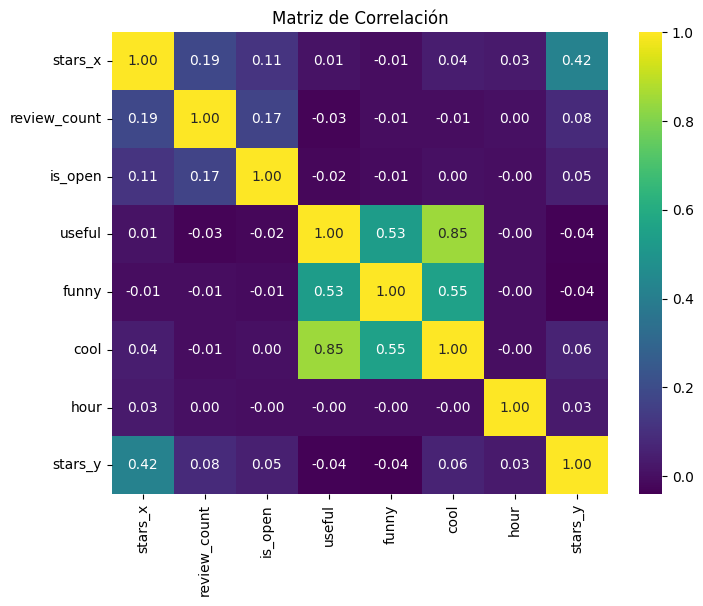

In [25]:
# Seleccionar las columnas relevantes
columns_to_consider = ['stars_x', 'review_count', 'is_open', 'useful', 'funny', 'cool', 'hour', 'stars_y']
df_corr = merged_df[columns_to_consider]

# Calcular la matriz de correlación
correlation_matrix = df_corr.corr()

# Crear un heatmap con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

#### Filtramos la data y exportamos en formato parquet el dataframe de `merged_df`

In [26]:
df_review_filtered = merged_df[['review_id', 'user_id', 'stars_y','useful', 'funny', 'cool', 'text', 'date']]
df_review_filtered.to_parquet('../Data_cleaned/Yelp/review_filtered.parquet')

In [35]:
duplicated_rows = df_review_filtered[df_review_filtered.duplicated()]
duplicated_rows

,review_id,user_id,stars_y,useful,funny,cool,text,date


### Carga del archivo `tip.json`
El archivo `tip.json` contiene información sobre los consejos (tips) proporcionados por los usuarios de Yelp para diversos negocios. Los tips son sugerencias breves que generalmente complementan las reseñas más extensas.

#### Descripción General
- **Texto del tip:** Contenido breve que proporciona una sugerencia rápida sobre el negocio.
- **Fecha:** Fecha en que se escribió el tip en formato `YYYY-MM-DD`.
- **ID del negocio:** Identificador único de 22 caracteres que se relaciona con el archivo `business.pkl`.
- **ID del usuario:** Identificador único de 22 caracteres que se relaciona con el archivo `user.parquet`.

#### Métrica de Interacción
- **Cumplidos:** Total de cumplidos recibidos por el tip, lo que refleja su utilidad o popularidad.

#### Usos Potenciales
Este archivo es útil para:
1. **Análisis del contenido:**
   - Examinar sugerencias breves y directas para entender lo que los usuarios consideran más relevante sobre un negocio.
   - Identificar patrones o temas comunes en las recomendaciones rápidas.
2. **Evaluación de popularidad:**
   - Medir la relevancia de un tip a través de la métrica de cumplidos.
3. **Estudios temporales:**
   - Analizar cuándo se generan más tips, identificando períodos de mayor actividad.
4. **Complemento de las reseñas:**
   - Proporcionar información adicional y directa que no está presente en reseñas más largas.

#### Consideraciones
El archivo `tip.json` es especialmente útil para comprender las recomendaciones rápidas de los usuarios y puede integrarse con los datos de reseñas (`review.json`) para obtener una visión más completa del comportamiento del cliente y la percepción del negocio.

In [27]:
df_tip = pd.read_json('../Datasets/Yelp/tip.json', lines= True)
print(df_tip.columns)
print("_"*100)
print(df_tip.dtypes)
df_tip.head(3)

Index(['user_id', 'business_id', 'text', 'date', 'compliment_count'], dtype='object')
____________________________________________________________________________________________________
user_id                     object
business_id                 object
text                        object
date                datetime64[ns]
compliment_count             int64
dtype: object


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0


#### Debido al interés en poder utiizar los datos que contiene el dataset, se procede a realizar un merge con la data antes filtrada y unida con `review.json` filtrando la data que es de utilidad antes de realizar el procedimiento

In [28]:
df_tip['tip_text']=df_tip['text']
tip_merged = pd.merge(filtered_restaurants, df_tip, how= 'inner')
df_tip_filtered=tip_merged[['business_id', 'tip_text']]

In [29]:
df_tip_filtered

,business_id,tip_text
0,MTSW4McQd7CbVtyjqoe9mw,Love their pastries and drinks!
1,MTSW4McQd7CbVtyjqoe9mw,Really good egg tart and bubble tea. Best we ...
2,MTSW4McQd7CbVtyjqoe9mw,Was told they stopped making almond tarts... U...
3,MTSW4McQd7CbVtyjqoe9mw,After 6 pm the bread is on sale!
4,MTSW4McQd7CbVtyjqoe9mw,Best steamed pork bun in chinatown!
...,...,...
621167,WnT9NIzQgLlILjPT0kEcsQ,I love Mexican food and I've got to say this i...
621168,2O2K6SXPWv56amqxCECd4w,The goat curry has great flavor but beware of ...
621169,hn9Toz3s-Ei3uZPt7esExA,Located in Grange Centre 1 minute off of white...
621170,hn9Toz3s-Ei3uZPt7esExA,"Consider getting a rice plate, instead. They g..."


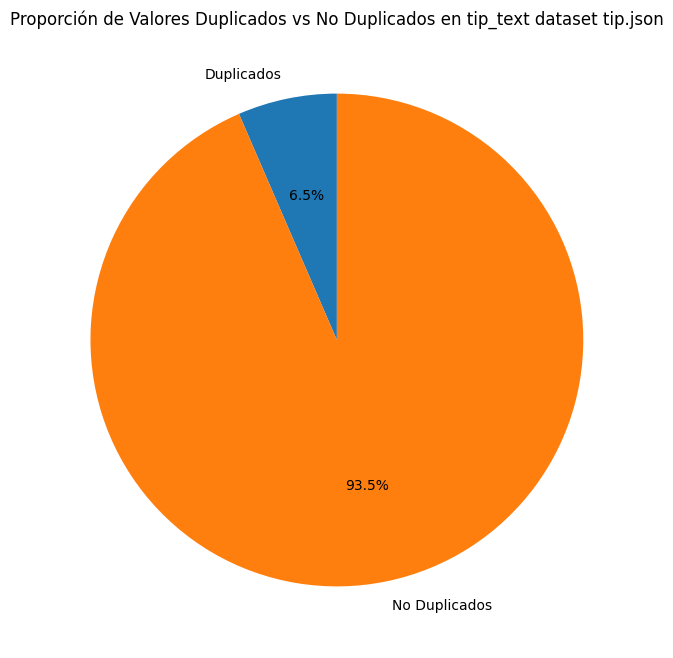

In [42]:
# Contar valores duplicados y no duplicados en la columna 'tip_text'
duplicated_count = df_tip_filtered['tip_text'].duplicated().sum()
non_duplicated_count = len(df_tip_filtered) - duplicated_count

# Crear los datos para el gráfico
labels = ['Duplicados', 'No Duplicados']
sizes = [duplicated_count, non_duplicated_count]

# Crear el diagrama circular
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Valores Duplicados vs No Duplicados en tip_text dataset tip.json')
plt.show()

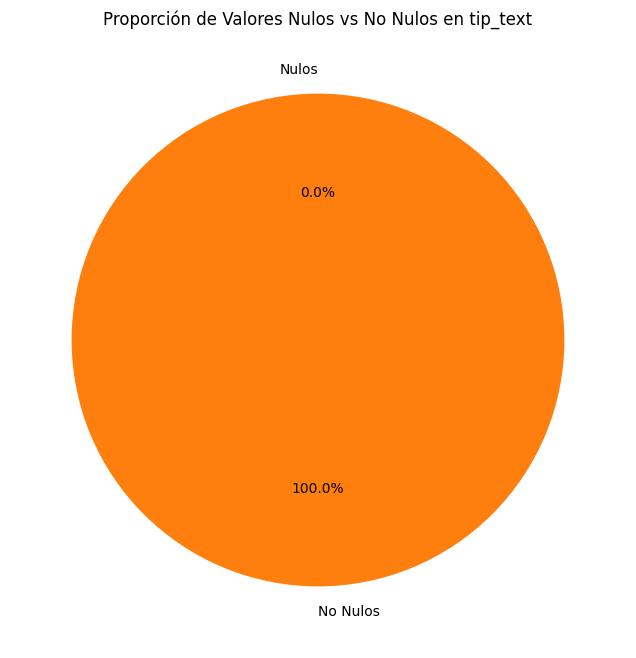

In [43]:
# Contar valores nulos y no nulos en el DataFrame
null_count = df_tip_filtered['tip_text'].isnull().sum()
non_null_count = len(df_tip_filtered) - null_count

# Crear los datos para el gráfico
labels = ['Nulos', 'No Nulos']
sizes = [null_count, non_null_count]

# Crear el diagrama circular
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Valores Nulos vs No Nulos en tip_text')
plt.show()

In [30]:
df_tip_filtered.to_parquet('../Data_cleaned/Yelp/tip_filtered.parquet', index=False)

### Carga del archivo `user.parquet`
El archivo `user.parquet` contiene un conjunto de datos que describe a los usuarios de Yelp y su actividad en la plataforma. Este archivo es útil para analizar el comportamiento de los usuarios, sus interacciones sociales y el impacto de sus contribuciones.

#### Descripción General
- **ID de usuario:** Identificador único de 22 caracteres que se relaciona con las reseñas en `review.json`.
- **Nombre del usuario:** Nombre registrado en Yelp.
- **Fecha de creación:** Fecha en que el usuario se unió a Yelp (formato YYYY-MM-DD).

#### Actividad del Usuario
- **Número de reseñas:** Total de reseñas escritas por el usuario.
- **Promedio de estrellas:** Calificación promedio otorgada en las reseñas.

#### Interacciones Sociales
- **Amigos:** Lista de IDs de otros usuarios que son amigos de este usuario.
- **Número de fans:** Cantidad de usuarios que siguen al usuario.

#### Métricas de Interacción
- **Votos útiles:** Número total de votos marcados como útiles para las contribuciones del usuario.
- **Votos graciosos:** Número total de votos marcados como graciosos.
- **Votos cool:** Número total de votos marcados como interesantes o "cool".

#### Distinciones y Logros
- **Miembro élite:** Años en los que el usuario fue considerado miembro élite en Yelp.
- **Cumplidos:** 
  - Total de cumplidos recibidos por categorías como "hot", "cute", "plain", "cool", entre otros.
  - Incluye cumplidos por perfiles, notas y fotos.

#### Usos Potenciales
Este archivo es ideal para:
- Identificar a usuarios influyentes en la plataforma mediante métricas como fans, votos y cumplidos.
- Analizar redes sociales y conexiones entre usuarios (a través de la lista de amigos).
- Estudiar patrones de actividad y contribución, incluyendo calificaciones promedio y reseñas escritas.
- Evaluar el impacto de los usuarios "élite" y su interacción con la comunidad.

En general, este archivo es clave para proyectos que buscan entender la dinámica social y el comportamiento de los usuarios en Yelp.

In [31]:
df_user = pd.read_parquet('../Datasets/Yelp/user.parquet')

In [32]:
df_user

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105592,4QGxxakRZeOlg_qDuxmTeQ,Jennilee,38,2012-01-19 23:33:02,74,9,6,,kmwNG5LZSHFmveg6wYYdrw,0,...,1,0,0,0,1,4,0,0,1,0
2105593,tmelBbVBGAzXBVfH2u_R6g,Gerry,19,2009-06-09 16:34:54,14,5,2,,"BFYdCAMFyjYHDwesndEXEg, _9fTIqfSJc7g3V_o76XRVg...",1,...,1,0,0,0,0,1,0,0,0,0
2105594,tpBznnD6uJN3m_pJubj09w,Emily,26,2013-08-13 23:18:11,4,1,2,,"bKV3ly2MuK-K1cptMrFknQ, liel18zRoSB4tEkUP7i6Cg...",0,...,0,0,0,0,1,0,0,0,0,0
2105595,Kst_srPw7GdYydMFYdCtzw,Heatheranne,25,2015-01-10 00:06:25,21,2,5,,"dzHTk52vbGtbktRm_B-wEg, fOfFLV7IbBDN6lzARaLqdg...",0,...,0,0,0,0,0,1,0,0,0,0


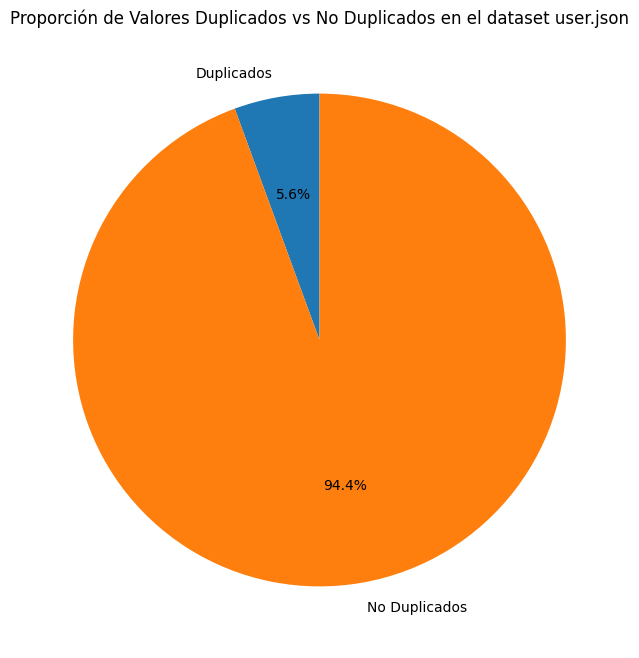

In [46]:
# Contar valores duplicados y no duplicados en la columna 'tip_text'
duplicated_count = df_user.duplicated().sum()
non_duplicated_count = len(df_user) - duplicated_count

# Crear los datos para el gráfico
labels = ['Duplicados', 'No Duplicados']
sizes = [duplicated_count, non_duplicated_count]

# Crear el diagrama circular
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Valores Duplicados vs No Duplicados en el dataset user.json')
plt.show()

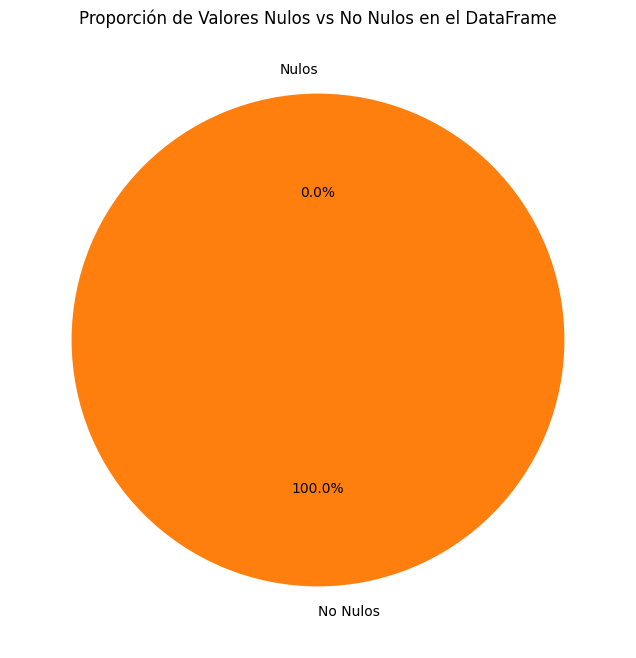

In [48]:
# Contar valores nulos y no nulos en el DataFrame
null_count = df_user.isnull().sum().sum()  # Suma todos los valores nulos en el DataFrame
non_null_count = df_user.size - null_count  # Total de celdas menos los nulos

# Crear los datos para el gráfico
labels = ['Nulos', 'No Nulos']
sizes = [null_count, non_null_count]  # Aseguramos que sea una lista simple

# Crear el diagrama circular
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Valores Nulos vs No Nulos en el DataFrame')
plt.show()
